<a href="https://colab.research.google.com/github/rzqmhb/PCVK_Ganjil_2023/blob/main/week03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


# Praktikum

---



In [64]:
import cv2 as cv
from PIL import Image
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

 Mengubah Tingkat Kecerahan Citra
----------------------------------
Masukkan nilai kecerahan : 69


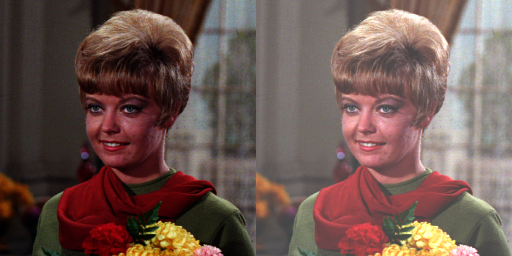

In [4]:
# @title Transformasi Linear Brightness
print(' Mengubah Tingkat Kecerahan Citra')
print('----------------------------------')
try :
  brightness = int(input('Masukkan nilai kecerahan : '))
except ValueError:
  print('Error, not a number.')

original = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# melakukan akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa nested loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# Tugas

---



 Inverse Citra
---------------


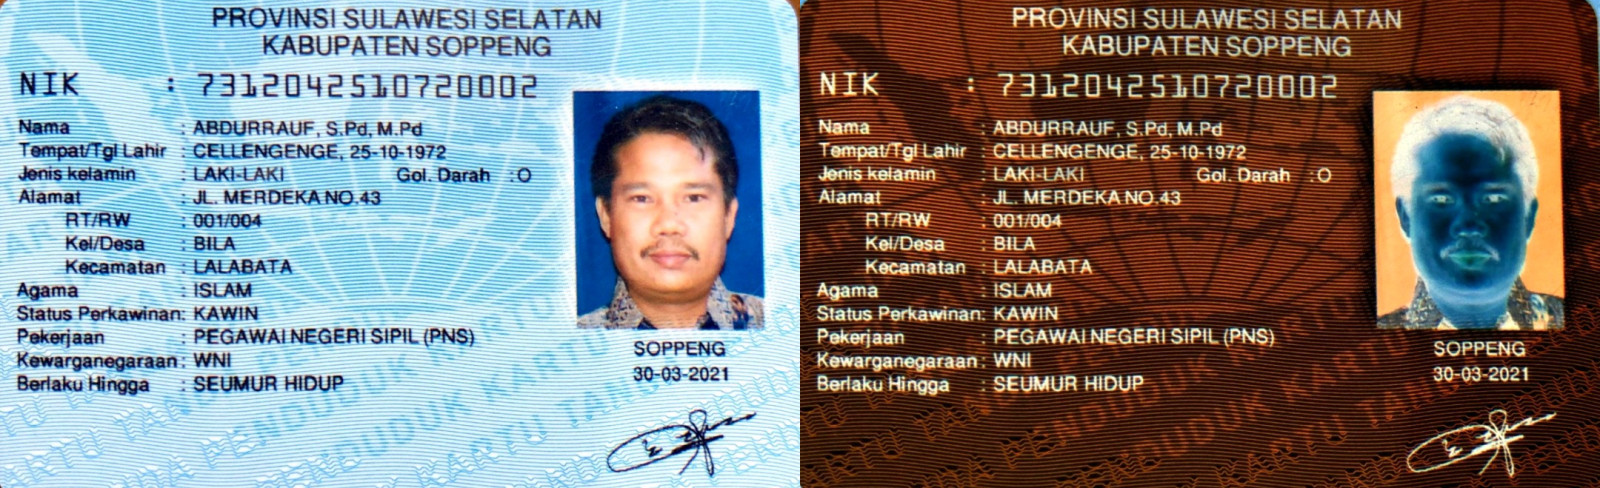

In [9]:
# @title Nomor 1 : Inverse
print(' Inverse Citra')
print('---------------')

ktp = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/KTP.jpeg')
inverse_ktp = np.zeros(ktp.shape, ktp.dtype)

for y in range(ktp.shape[0]):
  for x in range(ktp.shape[1]):
    for c in range(ktp.shape[2]):
      inverse_ktp[y,x,c] = np.clip(255 - ktp[y,x,c], 0, 255)

final_frame2 = cv.hconcat((ktp, inverse_ktp))
cv2_imshow(final_frame2)

 Mengubah Tingkat Contrast Citra
---------------------------------
Masukkan Nilai Brightness [-255 - 255] : 40
Masukkan Nilai Contrast [1.0 - 4.0] : 4


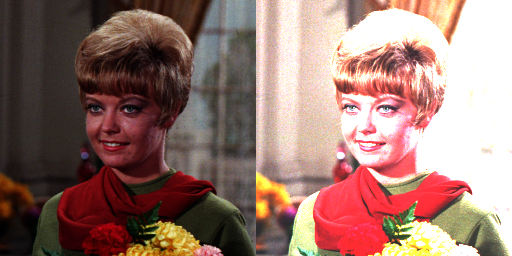

In [11]:
# @title Nomor 2 : Contrast
print(' Mengubah Tingkat Contrast Citra')
print('---------------------------------')

female = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/female.tiff')
contrast_female = np.zeros(female.shape, female.dtype)

try:
  female_brightness = int(input('Masukkan Nilai Brightness [-255 - 255] : '))
  female_contrast = int(input('Masukkan Nilai Contrast [1.0 - 4.0] : '))
except ValueError:
  print('Error, not a number.')

for y in range(female.shape[0]):
  for x in range(female.shape[1]):
    for c in range(female.shape[2]):
      contrast_female[y,x,c] = np.clip(female_contrast * female[y,x,c] + female_brightness, 0, 255)

final_frame3 = cv.hconcat((female, contrast_female))
cv2_imshow(final_frame3)

 Mengubah Tingkat Kecerahan Citra : Metode Transformasi Log
-----------------------------------------------------------
Masukkan Nilai Brightness [-255 - 255] : 60


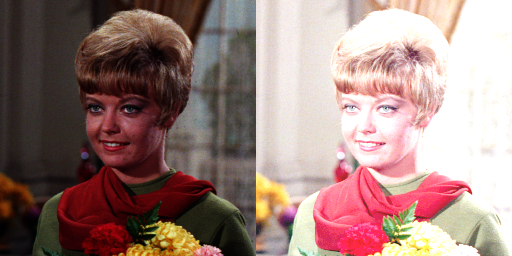

In [47]:
# @title Nomor 3 : Transformasi log
print(' Mengubah Tingkat Kecerahan Citra : Metode Transformasi Log')
print('-----------------------------------------------------------')

female2 = cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/female.tiff')
brightness_female = np.zeros(female2.shape, female2.dtype)

try:
  female_brightness2 = int(input('Masukkan Nilai Brightness [-255 - 255] : '))
except ValueError:
  print('Error, not a number.')

for y in range(female2.shape[0]):
  for x in range(female2.shape[1]):
    for c in range(female2.shape[2]):
      brightness_female[y,x,c] = np.clip(female_brightness2 * np.log(1 + female2[y,x,c]),0,255)

final_frame4 = cv.hconcat((female2, brightness_female))
cv2_imshow(final_frame4)

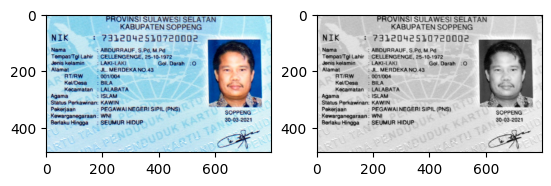

In [44]:
# @title Nomor 4a : Greyscale Averaging

ktp2 = cv.cvtColor(cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/KTP.jpeg'), cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)
ktp_avg = np.mean(ktp2, axis=2)

ax[0].imshow(ktp2)
ax[1].imshow(ktp_avg, cmap='gray')

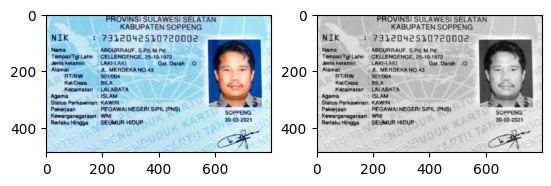

In [51]:
# @title Nomor 4b : Greyscale Lightness
ktp2 = cv.cvtColor(cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/KTP.jpeg'), cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)
ktp_light = np.max(ktp2, axis=2)/2 + np.min(ktp2, axis=2)/2

ax[0].imshow(ktp2)
ax[1].imshow(ktp_light, cmap='gray')

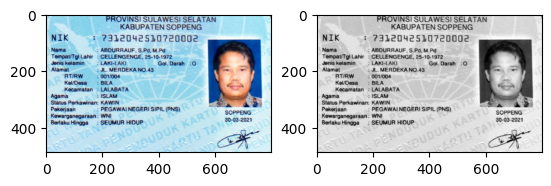

In [53]:
# @title Nomor 4c : Greyscale Luminance
ktp2 = cv.cvtColor(cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/KTP.jpeg'), cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2)
R,G,B = ktp2[:,:,0], ktp2[:,:,1], ktp2[:,:,2]
ktp_lum = 0.21 * R + 0.72 * G + 0.07 * B

ax[0].imshow(ktp2)
ax[1].imshow(ktp_lum, cmap='gray')

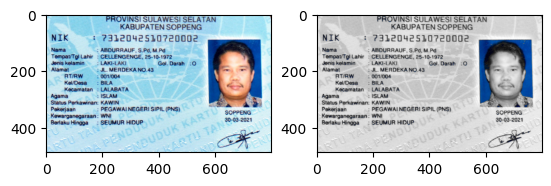

In [79]:
# @title Nomor 5 : Greyscale kecuali satu warna
img = cv.cvtColor(cv.imread('/content/drive/MyDrive/Kuliah_SMT_5/PCVK/KTP.jpeg'), cv.COLOR_BGR2RGB)

grayscale_img = np.zeros(img.shape, img.dtype)

#akses per piksel
for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    avg = np.clip((int(img[y,x,0]) + int(img[y,x,1]) + int(img[y,x,2]))/3, 0, 255)
    R, G, B = img[y,x,0], img[y,x,1], img[y,x,2]

    if (int((R>-1 and R<10) and (G>0 and G<180) and (B>0 and B<256))):
      grayscale_img[y,x] = img[y,x]
    else:
      grayscale_img[y,x] = avg

fig, ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[1].imshow(grayscale_img)



---

### Referensi :

- https://mmuratarat.github.io/2020-05-13/rgb_to_grayscale_formulas
- https://do-marlay-ka-moonh.medium.com/converting-color-images-to-grayscale-ab0120ea2c1e